In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/digit-recognizer/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/digit-recognizer/test.csv")

In [ ]:
sample = pd.read_csv("/content/drive/MyDrive/digit-recognizer/sample_submission.csv")
sample

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [ ]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(df_train.shape, df_test.shape)

(42000, 785) (28000, 784)


In [ ]:
df_train.iloc[0, list(range(1,10))]

pixel0    0
pixel1    0
pixel2    0
pixel3    0
pixel4    0
pixel5    0
pixel6    0
pixel7    0
pixel8    0
Name: 0, dtype: int64

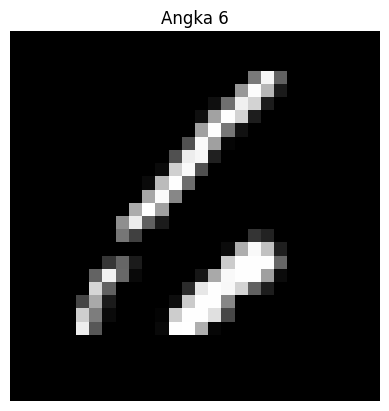

In [ ]:
idx = 12388
label = df_train['label'][idx]
img_vec = df_train.iloc[idx, list(range(1, 785))].to_numpy()
img = img_vec.reshape((28, 28))
img.shape

plt.title(f"Angka {label}")
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

## Data Preparation

In [ ]:
y = df_train['label'].to_numpy()
y

array([1, 0, 1, ..., 7, 6, 9])

In [ ]:
X = df_train.drop("label", axis=1).to_numpy()
X_test = df_test.to_numpy()
print(X.shape, X_test.shape)

(42000, 784) (28000, 784)


In [ ]:
# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state= 123)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(31500, 784) (31500,)
(10500, 784) (10500,)


In [ ]:
# create standardized dataset
stdscl = StandardScaler()
stdscl.fit(X_train)
X_train_std = stdscl.transform(X_train)
X_val_std = stdscl.transform(X_val)

In [ ]:
# Normalization
X_train_norm = X_train/255
X_val_norm = X_val/255
X_test_norm = X_test/255
print(X_train_norm.min(), X_train_norm.max())

0.0 1.0


In [ ]:
print(X_train[0][300:400])
print(X_train_norm[0][300:400])

[113   0   0   0   0   0   0   0   0   0   0   0   0 114 253 253 253 253
 253 253 253 253 253 253 249 251 253 251  18   0   0   0   0   0   0   0
   0   0   0   0   0  95 210 242 214 210 210 210 210 210 154 102  20 135
 253 150   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  48
   7   0   0   0   0   0   0   0   0 216 253 150   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
[0.44313725 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.44705882 0.99215686 0.99215686 0.99215686 0.99215686
 0.99215686 0.99215686 0.99215686 0.99215686 0.99215686 0.99215686
 0.97647059 0.98431373 0.99215686 0.98431373 0.07058824 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.37254902
 0.82352941 0.94901961 0.83921569 0.82352941 0.82352941 0.82352941
 0.82352941 0.82352941 0.60392157 0.4        0.07843137 0.52941176
 0.99215686 0.58823529

In [ ]:
print(X_train_std.min(), X_train_std.max())

-1.273787992531902 177.47957628989255


# Modelling

## Machine Learning

In [ ]:
svc = LinearSVC(verbose=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_val)
score = accuracy_score(y_val, y_pred)
score

[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8724761904761905

In [ ]:
y_pred_test = svc.predict(X_test)

In [ ]:
y_pred_test[:10]

array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3])

In [ ]:
# Create submission File
submit_dict = {
      "ImageId": list(range(1, len(y_pred_test)+1)),
      "Label": y_pred_test,
}

df_submit = pd.DataFrame(submit_dict)
df_submit.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [ ]:
submit_dict_2 = {
      "ImageId": [],
      "Label": [],
}

for i, y in enumerate(y_pred_test):
    submit_dict_2['ImageId'].append(i+1)
    submit_dict_2['Label'].append(y)

df_submit_2 =pd.DataFrame(submit_dict_2)
df_submit_2.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [ ]:
df_submit.to_csv("/content/drive/MyDrive/result.csv", index=False)

Neural Network

In [ ]:
epoch = 150

seed_value = 123
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 11828

In [ ]:
onehot = OneHotEncoder()
onehot.fit(y_train.reshape(-1, 1))
y_train_1hot = onehot.transform(y_train.reshape(-1, 1)).toarray()
y_val_1hot = onehot.transform(y_val.reshape(-1, 1)).toarray()

print(y_train.shape, y_train_1hot.shape)

(31500,) (31500, 10)


In [ ]:
print(y_train[1200])
print(y_train_1hot[1200])

2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    patience=140,
    restore_best_weights=True
)

#adam = tf.keras.optimizers.Adam(lr = 0.001)
sgd = tf.keras.optimizers.Adam(learning_rate = 0.00075)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy']
)

history = model.fit(
    X_train_norm,
    y_train_1hot,
    epochs=epoch,
    validation_data=(X_val_norm, y_val_1hot),
    callbacks=[es],
    batch_size=64,
)


Epoch 1/150
493/493 [==============================] - 5s 7ms/step - loss: 0.4818 - accuracy: 0.8519 - val_loss: 0.1927 - val_accuracy: 0.9424
Epoch 2/150
493/493 [==============================] - 3s 5ms/step - loss: 0.2102 - accuracy: 0.9373 - val_loss: 0.1360 - val_accuracy: 0.9595
Epoch 3/150
493/493 [==============================] - 3s 5ms/step - loss: 0.1640 - accuracy: 0.9493 - val_loss: 0.1254 - val_accuracy: 0.9630
Epoch 4/150
493/493 [==============================] - 3s 7ms/step - loss: 0.1360 - accuracy: 0.9575 - val_loss: 0.1017 - val_accuracy: 0.9695
Epoch 5/150
493/493 [==============================] - 4s 8ms/step - loss: 0.1164 - accuracy: 0.9643 - val_loss: 0.1065 - val_accuracy: 0.9684
Epoch 6/150
493/493 [==============================] - 3s 6ms/step - loss: 0.1006 - accuracy: 0.9679 - val_loss: 0.0939 - val_accuracy: 0.9720
Epoch 7/150
493/493 [==============================] - 3s 5ms/step - loss: 0.0861 - accuracy: 0.9723 - val_loss: 0.0922 - val_accuracy: 0.9726

In [ ]:
result = history.history
n_epochs=np.arange(0,len(result['accuracy']))

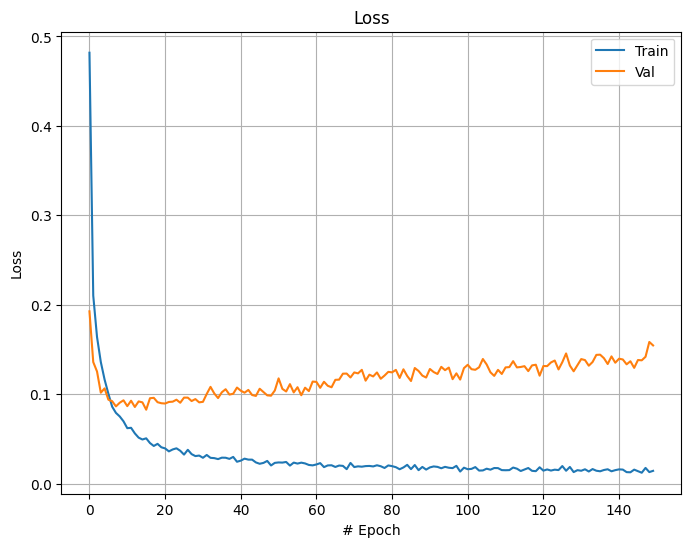

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Loss')
plt.plot(n_epochs, result['loss'])
plt.plot(n_epochs, result['val_loss'])
plt.xlabel('# Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'])
plt.grid()
plt.show()

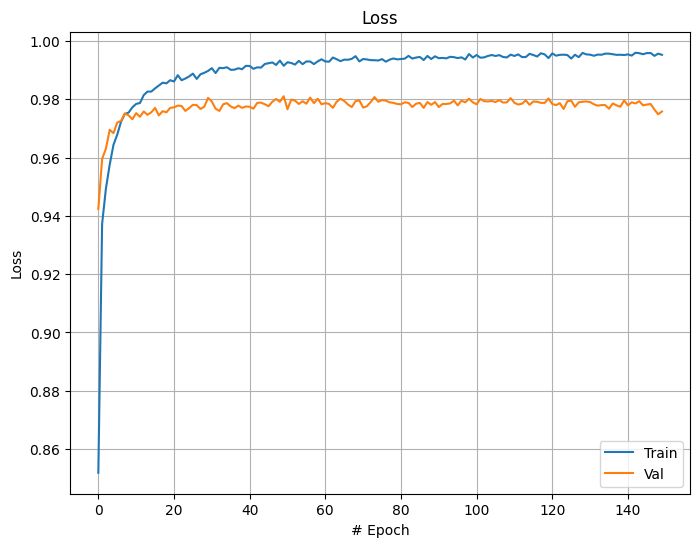

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Loss')
plt.plot(n_epochs, result['accuracy'])
plt.plot(n_epochs, result['val_accuracy'])
plt.xlabel('# Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'])
plt.grid()
plt.show()

In [ ]:
y_pred_test = model.predict(X_test)

875/875 [==============================] - 2s 2ms/step


In [ ]:
y_pred_test[0]

array([0.        , 0.        , 0.99999994, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

In [ ]:
y_pred = tf.math.argmax(y_pred_test, axis=1)

In [ ]:
print(y_pred_test[0])
print(y_pred.numpy()[0])

[0.         0.         0.99999994 0.         0.         0.
 0.         0.         0.         0.        ]
2


In [ ]:
y_pred = y_pred.numpy()
y_pred.shape

(28000,)

In [ ]:
# Create submission File
submit_dict = {
      "ImageId": list(range(1, len(y_pred_test)+1)),
      "Label": y_pred,
}

df_submit = pd.DataFrame(submit_dict)
df_submit.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [ ]:
df_submit.to_csv("/content/drive/MyDrive/digit-recognizer/result_nn_2.csv", index=False)

## K-means clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_val)
score = accuracy_score(y_val, y_pred)
score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.10495238095238095